In [2]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
#create list of needed variables
vars_list=['product_id','fam_status','department_id','max_order','order_frequency','region_flag','Age']

In [4]:
path=r'C:\Users\jadep\Documents\Career Foundry\Achievement 4\04-2020Instacart Basket Analysis'

In [5]:
df_ana = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'all_data_merged.csv'), usecols = vars_list)

In [6]:
#create age ranges
df_ana.loc[df_ana['Age']<31,'age_group']='young_adult'
df_ana.loc[(df_ana['Age']<=55) & (df_ana['Age']>=31),'age_group']='middle_age_adult'
df_ana.loc[df_ana['Age']>55,'age_group']='older_adult'

In [7]:
np.random.seed(4)
dev = np.random.rand(len(df_ana)) <= 0.7

In [8]:
big = df_ana[dev]

In [9]:
small =df_ana[~dev]

## married, middle-age adults, in South order frequency and max order

In [11]:
small.loc[(small['fam_status']=='married')&(small['age_group']=='middle_age_adult')&(small['region_flag']=='South')]['order_frequency'].mean()

10.393123526601247

In [12]:
small.loc[(small['fam_status']=='married')&(small['age_group']=='middle_age_adult')&(small['region_flag']=='South')]['order_frequency'].max()

30.0

In [13]:
small.loc[(small['fam_status']=='married')&(small['age_group']=='middle_age_adult')&(small['region_flag']=='South')]['order_frequency'].min()

0.0

In [17]:
small.loc[(small['fam_status']=='married')&(small['age_group']=='middle_age_adult')&(small['region_flag']=='South')]['max_order'].min()

3

In [19]:
small.loc[(small['fam_status']=='married')&(small['age_group']=='middle_age_adult')&(small['region_flag']=='South')]['max_order'].max()

99

In [20]:
small.loc[(small['fam_status']=='married')&(small['age_group']=='middle_age_adult')&(small['region_flag']=='South')]['max_order'].mean()

33.05274150613511

In [21]:
small.loc[(small['fam_status']=='married')&(small['age_group']=='middle_age_adult')&(small['region_flag']=='Northeast')]['order_frequency'].mean()

10.410770879296532

In [22]:
small.loc[(small['fam_status']=='married')&(small['age_group']=='middle_age_adult')&(small['region_flag']=='Northeast')]['order_frequency'].max()

30.0

In [23]:
small.loc[(small['fam_status']=='married')&(small['age_group']=='middle_age_adult')&(small['region_flag']=='Northeast')]['order_frequency'].min()

0.0

In [24]:
small.loc[(small['fam_status']=='married')&(small['age_group']=='middle_age_adult')&(small['region_flag']=='Northeast')]['max_order'].min()

3

In [25]:
small.loc[(small['fam_status']=='married')&(small['age_group']=='middle_age_adult')&(small['region_flag']=='Northeast')]['max_order'].max()

99

In [26]:
small.loc[(small['fam_status']=='married')&(small['age_group']=='middle_age_adult')&(small['region_flag']=='Northeast')]['max_order'].mean()

32.990202192025194

## create target variable using married,middle-age adults across regions

In [15]:
small.loc[(small['fam_status']=='married')&(small['age_group']=='middle_age_adult')&(small['region_flag']=='South'),'target_customer']='South_target'
small.loc[(small['fam_status']=='married')&(small['age_group']=='middle_age_adult')&(small['region_flag']=='Northeast'),'target_customer']='Northeast_target'
small.loc[(small['fam_status']=='married')&(small['age_group']=='middle_age_adult')&(small['region_flag']=='West'),'target_customer']='West_target'
small.loc[(small['fam_status']=='married')&(small['age_group']=='middle_age_adult')&(small['region_flag']=='Midwest'),'target_customer']='Midwest_target'

C:\Users\jadep\Anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\jadep\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [31]:
small.groupby('target_customer')['order_frequency'].mean()

target_customer
Midwest_target      11.605532
Northeast_target    11.634250
South_target        11.560890
West_target         11.509135
Name: order_frequency, dtype: float64

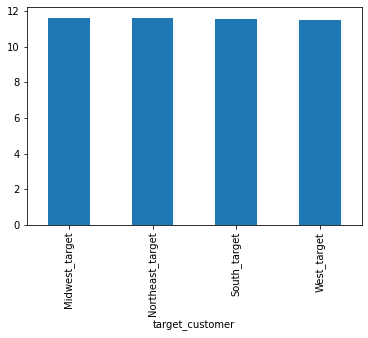

In [22]:
bar=small.groupby('target_customer')['order_frequency'].mean().plot.bar()

In [23]:
bar.figure.savefig(os.path.join(path,'Analysis','Visualizations','target_frequency_mean.png'))

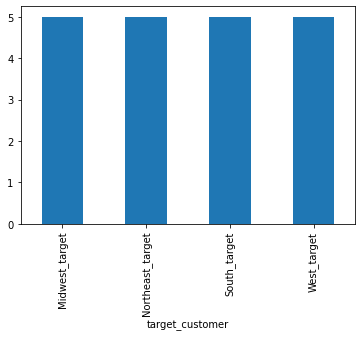

In [24]:
bar=small.groupby('target_customer')['order_frequency'].min().plot.bar()

In [25]:
bar.figure.savefig(os.path.join(path,'Analysis','Visualizations','target_frequency_min.png'))

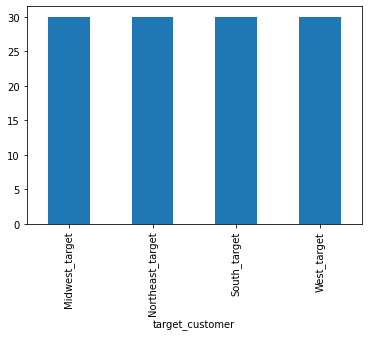

In [26]:
bar=bar=small.groupby('target_customer')['order_frequency'].max().plot.bar()

In [27]:
bar.figure.savefig(os.path.join(path,'Analysis','Visualizations','target_frequency_max.png'))

In [32]:
small.groupby('target_customer')['max_order'].mean()

target_customer
Midwest_target      33.036338
Northeast_target    32.990202
South_target        33.052742
West_target         33.277563
Name: max_order, dtype: float64

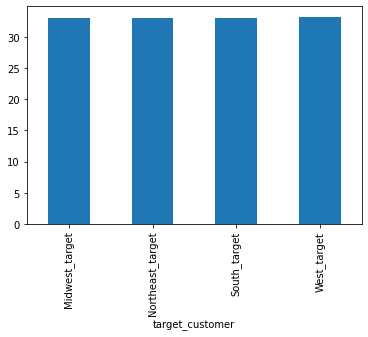

In [28]:
bar=bar=small.groupby('target_customer')['max_order'].mean().plot.bar()

In [29]:
bar.figure.savefig(os.path.join(path,'Analysis','Visualizations','targe_max_order_mean.png'))

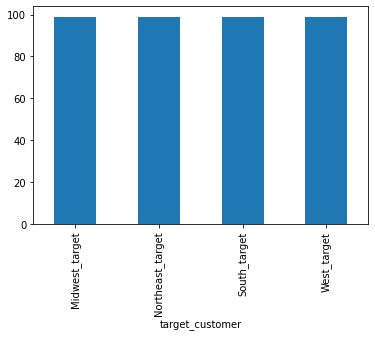

In [35]:
bar=bar=small.groupby('target_customer')['max_order'].max().plot.bar()

In [37]:
bar.figure.savefig(os.path.join(path,'Analysis','Visualizations','targer_max_order_min.png'))

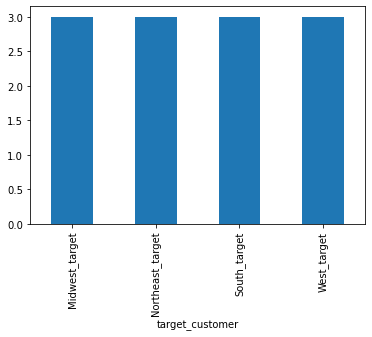

In [33]:
bar=small.groupby('target_customer')['max_order'].min().plot.bar()

In [34]:
bar.figure.savefig(os.path.join(path,'Analysis','Visualizations','target_max-order_min.png'))

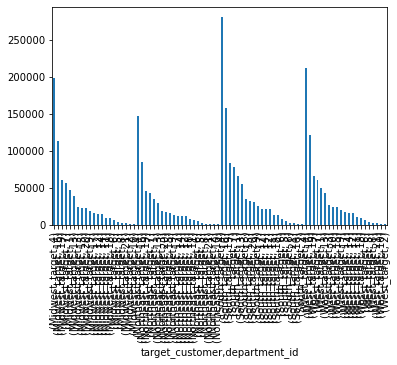

In [41]:
bar=small.groupby('target_customer')['department_id'].value_counts().plot.bar()

In [51]:
bar.figure.savefig(os.path.join(path,'Analysis','Visualizations','target_departments.png'))